In [3]:
%matplotlib inline  
import numpy as np 
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
#plt.style.use('ggplot')
from pylab import plot, show
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
import csv
import math

In [38]:
def rating_distribution(path):
    '''
    plot rating versus 
    1.ratings count
    2.text reviews count
    3.pages count
    '''
    f=open(path,'r')
    reader = csv.reader(f)
    fieldnames = next(reader)
    # print(fieldnames)
    csv_reader = csv.DictReader(f,fieldnames=fieldnames)
    ratingd={}
    trcnt={}
    pcnt={}
    for i in range(1,6):
        ratingd[int(i)]=0
        trcnt[i]=[]
        pcnt[i]=[]
    for row in csv_reader:
        d={}
        for k,v in row.items():
            d[k]=v
        t=d['text_reviews_count']
        r=d['rating']
        p=d['num_pages']
        try:
            if t!= '' and int(math.ceil(float(r)))!=0:
                trcnt[int(math.ceil(float(r)))].append(int(t))
            if int(math.ceil(float(r)))!=0:
                ratingd[int(math.ceil(float(r)))]+=1
            #print(p)
            if p!='' and int(math.ceil(float(r)))!=0:
                pcnt[int(math.ceil(float(r)))].append(int(p))
        except:
            continue
    #print(pcnt)
    #print(trcnt)
    x=[]
    rd=[]
    trd=[]
    pd=[]
    from statistics import median 
    #median and average
    for i in ratingd:
        x.append("%s - %s"%(int(i-1),int(i)))
        rd.append(ratingd[i])
        trd.append(sum(trcnt[i])/len(trcnt[i]))
        pd.append(sum(pcnt[i])/len(pcnt[i]))

    rdt=[]
    trdt=[]
    pdt=[]
    
    #normalize
    for i in range(0,5):
        rdt.append(rd[i]/sum(rd))
        trdt.append(trd[i]/sum(trd))
        pdt.append(pd[i]/sum(pd))

    '''
    ls=sns.barplot(x,rdt,color='darkred')
    ls.set_xlabel("Book Ratings",fontsize=30)
    ls.set_ylabel("Ratings Count",fontsize=30)
    ls.set_title("Book Ratings Distribution",fontsize=40)
    '''
    import numpy as np
    fig=plt.figure(figsize=(40,15))
    xx = np.arange(len(x))  
    width = 0.2   
    fig,ax = plt.subplots(figsize=(20,15))
    #plt.rcParams["figure.figsize"]=(50,50)
    ax.bar(xx-width,rdt,width,color='darkred',label='Ratings Count')
    ax.bar(xx,trdt,width,color= 'midnightblue',label='Text Reviews Count')
    ax.bar(xx+width,pdt,width,color= 'peru',label='Pages Count')
    ax.set_xticks(xx-3*width)
    plt.xticks(xx,['0 - 1', '1 - 2', '2 - 3', '3 - 4', '4 - 5'],fontsize=100,fontweight='bold')
    plt.yticks(fontsize=30,fontweight='bold')
    plt.xlabel('Rating Intervals',fontweight='bold',fontsize=28)
    plt.ylabel('Normalized Count',fontweight='bold',fontsize=28)
    plt.tick_params(labelsize=30)
    plt.title('')
    ax.legend(loc=2,fontsize=28)
    plt.show()
    fig.savefig('triRatings.png',transparent=True)


<Figure size 2880x1080 with 0 Axes>

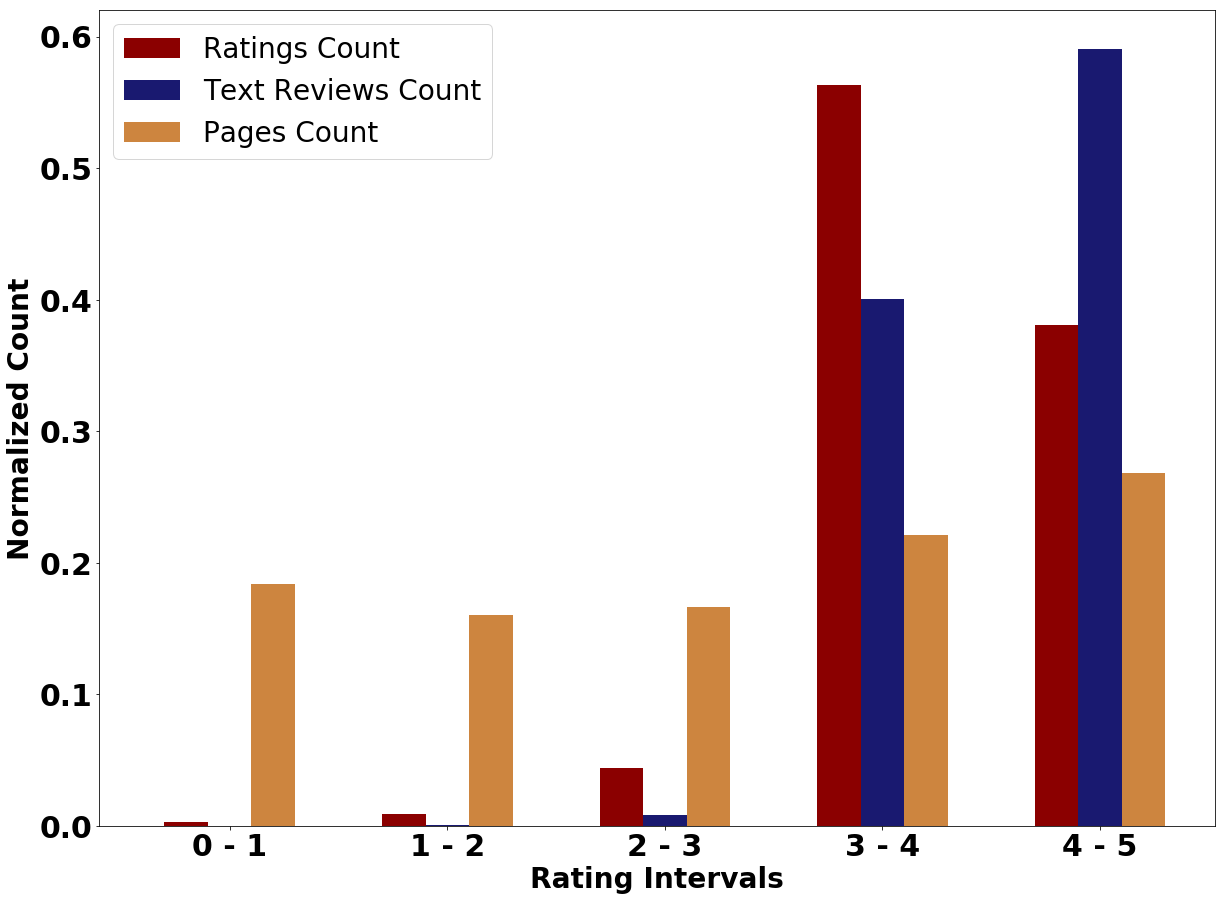

In [39]:
path='datav4.csv'
rating_distribution(path)